In [8]:
import networkx as nx
from itertools import combinations, groupby
import random
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Tuple

In [20]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

def get_stochastic_neighbour_matrix(nxg: nx.Graph = None, adjacency_matrix: List[List[int]] = None) -> List[List[float]]:
        """
        Creates a stochastic adjacency matrix for a specified graph: g, each row represents a node in the graph
        where the values in each column represents if there is an edge or not between those nodes.
        The values for each neighbour is represented by 1/(number of neighbours), if no edge exists this value is 0.

        :param nxg: Networkx bi-directional graph object.
        :type nxg: nx.Graph
        :param adjacency_matrix: Self assigned adjacency matrix.
        :type adjacency_matrix: List[List[int]]
        :return A: List of rows, representing the adjacency matrix.
        :rtype: List[List[float]]
        """
        if nxg is None and adjacency_matrix is None:
            raise ValueError('At least one parameter of nxg or adjacency_matrix needs to be provided')

        # If we wasn't provided with the adjacency matrix, get it.
        if adjacency_matrix is None:
            # Get the adjacency matrix
            adjacency_matrix = nx.to_pandas_adjacency(G, dtype=int)

        mx = []

        # Iterate over each row
        for row_id, _ in enumerate(adjacency_matrix):
            # Calculate the sum for each row
            row_sum = sum(adjacency_matrix[row_id])
            # Divide each node in the row with the sum of the row
            mx.append(list(map(lambda x: (x / row_sum), adjacency_matrix[row_id])))

        # Working solution that might however be worse than the previous solution.
        # mx = list(map(lambda row: list(map(lambda cell: cell / sum(row), row)), mx))

        return pd.DataFrame(mx)

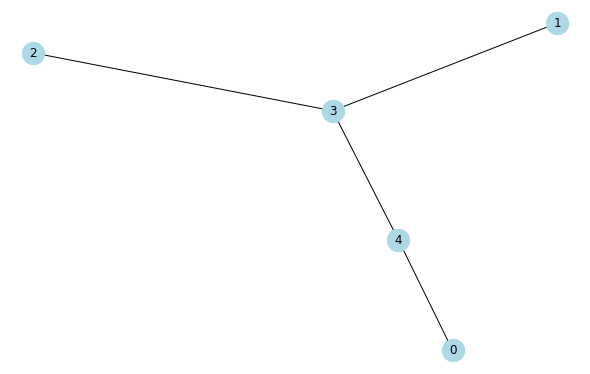

In [21]:
nodes = 5
seed = random.randint(1,10)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)


In [26]:
A = nx.to_pandas_adjacency(G, dtype=int)
A

,0,1,2,3,4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,1,0,1
4,1,0,0,1,0


In [28]:
A_s = get_stochastic_neighbour_matrix(G)
A_s

,0,1,2,3,4
0,0.0,0.000000,0.000000,0.0,1.000000
1,0.0,0.000000,0.000000,1.0,0.000000
2,0.0,0.000000,0.000000,1.0,0.000000
3,0.0,0.333333,0.333333,0.0,0.333333
4,0.5,0.000000,0.000000,0.5,0.000000


In [29]:
A_s.dot(A_s)

,0,1,2,3,4
0,0.500000,0.000000,0.000000,0.500000,0.000000
1,0.000000,0.333333,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.333333
3,0.166667,0.000000,0.000000,0.833333,0.000000
4,0.000000,0.166667,0.166667,0.000000,0.666667
